In [1]:
#load in libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Problem 01

In [2]:
#open all the csv file
af = pd.read_csv("problem_01/A.csv")
bf = pd.read_csv("problem_01/B.csv")
cf = pd.read_csv("problem_01/C.csv")
df = pd.read_csv("problem_01/D.csv")

In [3]:
#check if there are missing values
af.isna().sum()
bf.isna().sum()
cf.isna().sum()
df.isna().sum()

x    0
y    0
dtype: int64

In [67]:
df.head()

,x,y
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47


### 1a) calculate sample average and sample variance

##### Dataframe A

In [4]:
#get the sample mean for x and y
#USING .MEAN() TO GET THE SAMPLE AVERAGE

#sample mean for x
ax = af['x'].mean()
#sample mean for y
ay = af['y'].mean()
print(" The sample mean for x is:",ax,'\n',"sample mean for y is",ay)


#get the sample variance for x and y
#USING .VAR()FUNCTION TO GET VARIANCE

#sample variance for x
axv = af['x'].var()
#sample variance for y
ayv = af['y'].var()
print(" The sample variance for x is:",axv,'\n',"sample variance for y is",ayv)


 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909093
 The sample variance for x is: 11.0 
 sample variance for y is 4.127269090909091


##### Dataframe B

In [5]:
#get the sample mean for x and y

#sample mean for x
bx = bf['x'].mean()
#sample mean for y
by = bf['y'].mean()
print(" The sample mean for x is:",bx,'\n',"sample mean for y is",by)

#get the sample variance for x and y

#sample variance for x
bxv = bf['x'].var()
#sample variance for y
byv = bf['y'].var()
print(" The sample variance for x is:",bxv,'\n',"sample variance for y is",byv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909091
 The sample variance for x is: 11.0 
 sample variance for y is 4.127629090909091


##### Dataframe C

In [6]:
#get the sample mean for x and y

#sample mean for x
cx = cf['x'].mean()
#sample mean for y
cy = cf['y'].mean()
print(" The sample mean for x is:",cx,'\n',"sample mean for y is",cy)

#get the sample variance for x and y

#sample variance for x
cxv = cf['x'].var()
#sample variance for y
cyv = cf['y'].var()
print(" The sample variance for x is:",cxv,'\n',"sample variance for y is",cyv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.500000000000001
 The sample variance for x is: 11.0 
 sample variance for y is 4.12262


##### Dataframe D

In [7]:
#get the sample mean for x and y

#sample mean for x
dx = df['x'].mean()
#sample mean for y
dy = df['y'].mean()
print(" The sample mean for x is:",dx,'\n',"sample mean for y is",dy)

#get the sample variance for x and y

#sample variance for x
dxv = df['x'].var()
#sample variance for y
dyv = df['y'].var()
print(" The sample variance for x is:",dxv,'\n',"sample variance for y is",dyv)

 The sample mean for x is: 9.0 
 sample mean for y is 7.50090909090909
 The sample variance for x is: 11.0 
 sample variance for y is 4.12324909090909


#####  Summary statistics compare across the data sets
As we can see from below all the sample mean and variance fo each dataset it seems that the sample average and sample variance for X is the same there is a small flucutation with the y sample average but shouldn't make any differences, there is a slight difference between y sample variance as every y sample variance seems to be around the same except for y sample variance from dataframe C and D as its slightly smaller than other y variance
###### DATAFRAME A:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909093
 The sample variance for x is: 11.0 
 sample variance for y is 4.127269090909091
###### DATAFRAME B:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500909090909091
 The sample variance for x is: 11.0 
 sample variance for y is 4.127629090909091
###### DATAFRAME C:
 The sample mean for x is: 9.0 
 sample mean for y is 7.500000000000001
 The sample variance for x is: 11.0 
 sample variance for y is 4.12262
###### DATAFRAME D:
 The sample mean for x is: 9.0 
 sample mean for y is 7.50090909090909
 The sample variance for x is: 11.0 
 sample variance for y is 4.12324909090909

### 1b) Design matrix for each dataset

In [8]:
#use patsy's library to build the design matrix
import patsy

In [9]:
#Matrix for A
ya,Xa = patsy.dmatrices("y~x", data = af, return_type = 'dataframe')
#print(Xa)
#print(Xa.design_info)

In [10]:
#Matrix for B
yb, Xb = patsy.dmatrices("y~x", data = bf, return_type = 'dataframe')
#print(Xb)

In [11]:
#Matrix for C
yc,Xc = patsy.dmatrices("y~x", data = cf, return_type = 'dataframe')
#print(Xc)

In [12]:
#Matrix for D
yd,Xd = patsy.dmatrices("y~x", data = df, return_type = 'dataframe')
#print(Xd)

### 1C) Calculate MLEs

$(X^TX)^{-1}X^Ty$

##### MLEs for A

In [13]:
mod = sm.OLS(ya, Xa)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00217
Time:                        17:14:41   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [14]:
#convert the columns to ndarray
xac = Xa.to_numpy()
yac = ya.to_numpy()

In [15]:
#get the dot product of Xmat and ycol
#transpose the Xa data 
np.dot(np.transpose(xac), yac)

array([[ 82.51],
       [797.6 ]])

In [16]:
# take the matrix inverse
np.linalg.inv(np.dot(np.transpose(xac), xac))

array([[ 0.82727273, -0.08181818],
       [-0.08181818,  0.00909091]])

In [17]:
# find the MLEs
np.dot(np.linalg.inv(np.dot(np.transpose(xac), xac)), np.dot(np.transpose(xac), yac))

array([[3.00009091],
       [0.50009091]])

In [18]:
print(res.params)

Intercept    3.000091
x            0.500091
dtype: float64


##### MLEs for B

In [19]:
mod = sm.OLS(yb,Xb)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00218
Time:                        17:14:42   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

In [20]:
xbc = Xb.to_numpy()
ybc = yb.to_numpy()

In [21]:
np.dot(np.transpose(xbc),xbc)

array([[  11.,   99.],
       [  99., 1001.]])

In [22]:
np.linalg.inv(np.dot(np.transpose(xbc),xbc))

array([[ 0.82727273, -0.08181818],
       [-0.08181818,  0.00909091]])

In [23]:
np.dot(np.linalg.inv(np.dot(np.transpose(xbc), xbc)), np.dot(np.transpose(xbc), ybc))

array([[3.00090909],
       [0.5       ]])

In [24]:
#check the MLEs
print(res.params)

Intercept    3.000909
x            0.500000
dtype: float64


##### MLEs for C

In [25]:
mod = sm.OLS(yc,Xc)

In [26]:
#convert to ndarray
xcc = Xc.to_numpy()
ycc = yc.to_numpy()

In [27]:
np.dot(np.transpose(xcc),xcc)

array([[  11.,   99.],
       [  99., 1001.]])

In [28]:
# find the MLEs
np.dot(np.linalg.inv(np.dot(np.transpose(xcc), xcc)), np.dot(np.transpose(xcc), ycc))

array([[3.00245455],
       [0.49972727]])

In [29]:
print(res.params)

Intercept    3.000909
x            0.500000
dtype: float64


##### MLEs for D

In [30]:
mod = sm.OLS(yd,Xd)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00216
Time:                        17:14:42   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.0

In [31]:
xdc = Xd.to_numpy()
ydc = yd.to_numpy()

In [32]:
np.dot(np.transpose(xdc),xdc)

array([[  11.,   99.],
       [  99., 1001.]])

In [33]:
np.dot(np.linalg.inv(np.dot(np.transpose(xdc), xdc)), np.dot(np.transpose(xdc),ycc))

array([[ 9.399],
       [-0.211]])

In [34]:
print(res.params)

Intercept    3.001727
x            0.499909
dtype: float64


##### A.csv MLEs:
Intercept=3.000091,
x=0.500091
##### B.csv MLEs:
Intercept=3.000909,
x=0.500000
##### C.csv MLEs:
Intercept=3.000909,
x=0.500000
##### D.csv MLEs:
Intercept=3.001727,
x=0.499909

##### Conclusion:
For all the intercept in mles are very close, the x value for the all mles are extremely close hoovering around 0.50000 except for x-value at D.csv where it's 0.49999 but if you round it up it would be the same

### 1d) Calculate the Mean Squared Error (MSE)

In [35]:
#using sklearn's linear model to get the mean squared error
from sklearn import linear_model
#using sklearn's metrics to check if the mse result is correct
from sklearn.metrics import mean_squared_error

##### MSE for A.csv

In [36]:
#data for the linear regression model
x = af[['x']]
y = af[['y']]
#implementing the regression model
lm = linear_model.LinearRegression()
lm.fit(x,y)
#check the coefficient
print(lm.coef_)

[[0.50009091]]


In [37]:
#MSE for A.csv
np.mean((lm.predict(x)-y)**2)

y    1.251154
dtype: float64

In [38]:
#check the mse value 
mean_squared_error(y,lm.predict(x))

1.2511536363636362

##### MSE for B.csv

In [39]:
#data for the linear regression model
x = bf[['x']]
y = bf[['y']]
#implementing the model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#use numpy.mean to get the mse value 
np.mean((lm.predict(x)-y)**2)

y    1.25239
dtype: float64

In [41]:
#check using metrics.mse
mean_squared_error(y,lm.predict(x))

1.2523900826446281

##### MSE for C.csv

In [42]:
#data for linear regression model
x = cf[['x']]
y = cf[['y']]
#implementing the linear regression 
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#implement np.mean to get the mse value
np.mean((lm.predict(x)-y)**2)

y    1.250563
dtype: float64

In [44]:
#using metrics to check the mse value
mean_squared_error(y,lm.predict(x))

1.2505628925619836

##### MSE for D.csv

In [45]:
#data for the linear regression model
x = df[['x']]
y = df[['y']]
#implement the linear regression model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#implement np.mean to get the mse value
np.mean((lm.predict(x)-y)**2)

y    1.249317
dtype: float64

In [47]:
#using metrics to double check if the mse value is correct
mean_squared_error(y,lm.predict(x))

1.249317272727273

##### A.csv MSE
y=1.251154

##### B.csv MSE
y=1.25239

##### C.csv MSE
y=1.250563

##### D.csv MSE
y=1.249317

##### Conclusion:
All the MSE value are hovering around 1.25 some of a and c are .01 and .02 bigger and d is .01 smaller other that theres not much deviation from 1.25


### 1e) R-squared values for each model

##### The $R^2$value for A.csv

In [48]:
#implementing sklearn library for linear regression to get the r^2 value
from sklearn import linear_model
#implementing sklearn.metrics to check the r^2 value
from sklearn.metrics import r2_score as r2

In [49]:
#create the x and y value for the linear regression
x = af[['x']]
y = af[['y']]
#calling the linear regression function from linear_model
lm = linear_model.LinearRegression()
#fit the variable in an linear regression
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
rs = lm.score(x,y)
print("The R^2 value for A.csv is:",rs)

The R^2 value for A.csv is: 0.666542459508775


In [51]:
#check the r^2 value
r2(y,lm.predict(x))

0.666542459508775

##### The $R^2$value for B.csv

In [52]:
#create the x and y value for the linear model
x = bf[['x']]
y = bf[['y']]
#implementing the linear regression
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#getting the r^2 value for the model
rs = lm.score(x,y)
print("The R^2 value for B.csv is:",rs)

The R^2 value for B.csv is: 0.6662420337274844


In [54]:
#check the r^2 value
r2(y,lm.predict(x))

0.6662420337274844

##### The $R^2$value for C.csv

In [55]:
#create the x and y value for the linear model
x = cf[['x']]
y = cf[['y']]
#implementing the linear model
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#getting the r^2 value
rs = lm.score(x,y)
print("The R^2 value for C.csv is:",rs)

The R^2 value for C.csv is: 0.6663240410665592


In [57]:
#check the r^2 value
r2(y,lm.predict(x))

0.6663240410665592

##### The $R^2$value for D.csv

In [68]:
X = df[['x']]
y = df[['y']]
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
rs = lm.score(x,y)
print("The R^2 value for D.csv is:", rs)

The R^2 value for D.csv is: 0.09862533386071981


In [70]:
#check the r^2 value
r2(y,lm.predict(x))

0.09862533386071981

##### A.csv $R^2$ 
The R^2 value for A.csv is: 0.666542459508775
##### B.csv $R^2$ 
The R^2 value for B.csv is: 0.6662420337274844
##### C.csv $R^2$ 
The R^2 value for C.csv is: 0.6663240410665592
##### D.csv $R^2$ 
The R^2 value for D.csv is: 0.6667072568984653

##### Conclusion

##### 1f) compare MSE to $R^2$ Value

The R^2 value for the model is better fit because the value for the MSE is over one after reading through multiple documentation and the slides from class it seems that the greater the MSE value the less accurate it is so therefore
the R^2 value for the model would be better suited.

##### 1g) Scatter plot

In [61]:
#import libraries necessary to create the scatterplot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#####
from mlxtend.plotting import plot_linear_regression

In [62]:
import seaborn as sns; sns.set()
#sns.set(color_codes = True)

##### Scatter plot for A.csv

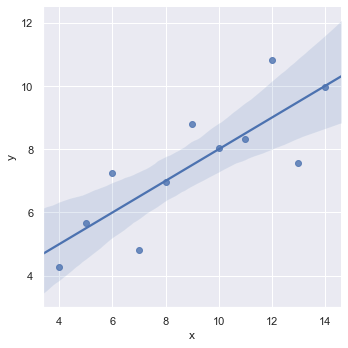

In [63]:
sns.lmplot(x='x', y='y', data=af)

##### Scatter plot for B.csv

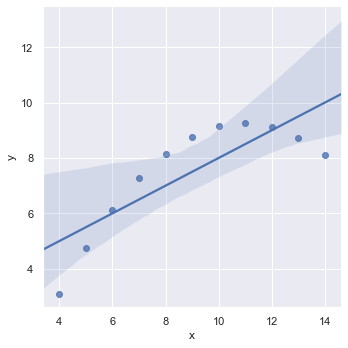

In [64]:
sns.lmplot(x='x',y='y',data=bf)

##### Scatter plot for C.csv

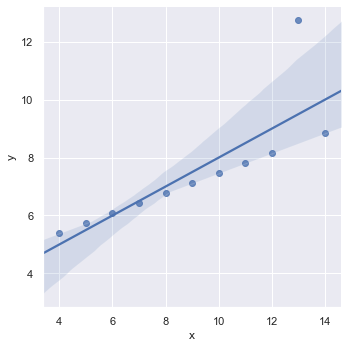

In [65]:
sns.lmplot(x='x',y='y',data=cf)

##### Scatter plot for D.csv

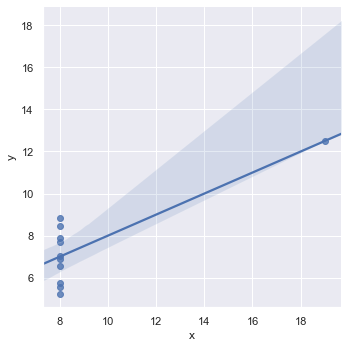

In [66]:
sns.lmplot(x='x',y='y',data=df)